In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from typing import List, Tuple, Dict

from evaluate_prf1 import evaluate_prf1

In [75]:
# def prf1_plot(precisions, recalls, f1s, assoc_reqs):
#     fig, ax = plt.subplots(1,3)
#     ax[0].plot(assoc_reqs, precisions, label='Precision')
#     ax[1].plot(assoc_reqs, recalls, label='Recall')
#     ax[2].plot(assoc_reqs, f1s, label='F1')
#     return ax

def prf1_plot(methods: List[str], precisions: Dict[str, List[float]], recalls: Dict[str, List[float]], 
              f1s:  Dict[str, List[float]], req_err_ang_dist_pairs: np.array):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    styles = [':', '--', '-.']
    
    for i, method in enumerate(methods):
        ax[0].plot(req_err_ang_dist_pairs[:,0], precisions[method], label=method, linestyle=styles[i % len(styles)])
        ax[1].plot(req_err_ang_dist_pairs[:,0], recalls[method], label=method, linestyle=styles[i % len(styles)])
        ax[2].plot(req_err_ang_dist_pairs[:,0], f1s[method], label=method, linestyle=styles[i % len(styles)])

    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    ax[2].set_title('F1')
    for i in range(3):
        ax[i].set_xlabel('Angular Error (deg)')
        ax[i].set_ylabel('Value')
        ax_cp = ax[i].twiny()
        ax_cp.set_xlim(ax[i].get_xlim())
        ax_cp.set_xticks(req_err_ang_dist_pairs[:,0])
        ax_cp.set_xticklabels(req_err_ang_dist_pairs[:,1])
        ax_cp.set_xlabel('Distance Error (m)')
    ax[0].legend()
    
def prf1_sweep(pkl_path, req_assoc, req_overlap=0.5):
    pkl_file = open(pkl_path, 'rb')
    overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat = pickle.load(pkl_file)
    
    req_err_ang_dist_pairs = np.array([
        (0.5, 0.25),
        (1.0, 0.5),
        (2.0, 1.0),
        (3.0, 1.5),
        (4.0, 2.0),
        (5.0, 2.5),
        # (6.0, 3.0),
        # (7.0, 3.5),
        # (8.0, 4.0),
        # (9.0, 4.5),
        # (10.0, 5.0)
    ])
    
    precisions = []
    recalls = []
    f1s = []
    for req_err_ang, req_err_dist in req_err_ang_dist_pairs:
        precision, recall, f1 = evaluate_prf1(overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, req_err_ang=req_err_ang, req_err_dist=req_err_dist, req_overlap=req_overlap, req_assoc=req_assoc)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    
    return precisions, recalls, f1s, req_err_ang_dist_pairs

In [80]:

methods = ["point2d", "point3d", "vol2d", "vol3d", "gravity", "volgrav"]
req_assoc_s2s1 = {
    "gravity": 8,
    "point2d": 11,
    "point3d": 11,
    "vol2d": 7,
    "vol3d": 8,
    "volgrav": 6
}
req_assoc_a2s1 = {
    "gravity": 10,
    "point2d": 11,
    "point3d": 11,
    "vol2d": 7,
    "vol3d": 7,
    "volgrav": 7
}
# results_dir = "/home/masonbp/results/west_point_2023/segment_align/06_for_pr/sparkal2_sparkal1"
# req_assoc = req_assoc_s2s1
# req_overlap = 0.75
results_dir = "/home/masonbp/results/west_point_2023/segment_align/06_for_pr/acl_jackal2_sparkal1"
req_assoc = req_assoc_a2s1
req_overlap = 0.5

precisions = {}
recalls = {}
f1s = {}

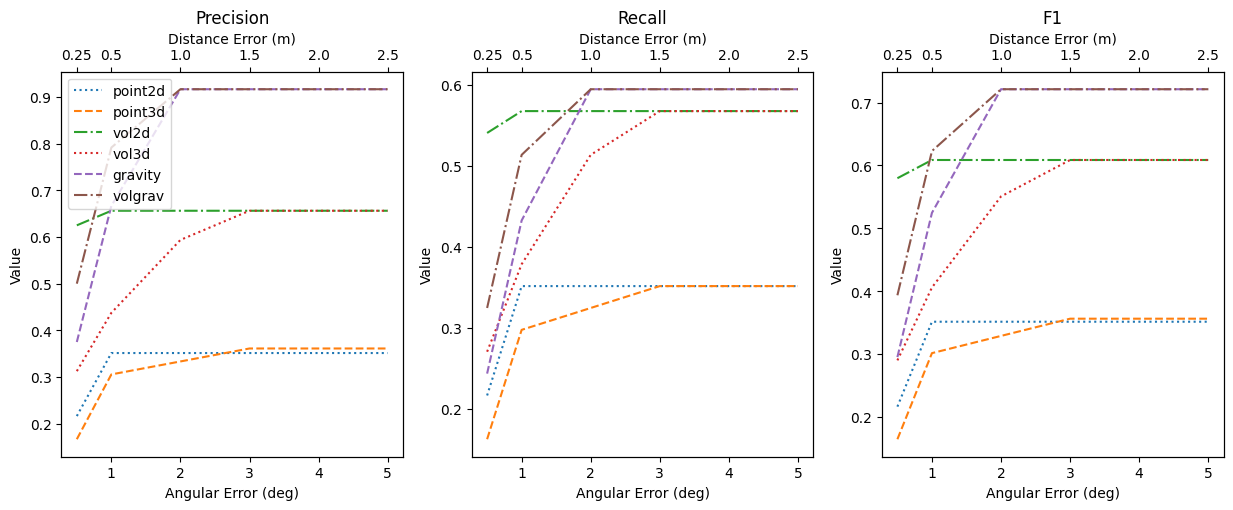

In [81]:
for method in methods:
    pkl_path = f"{results_dir}/{method}.pkl"
    p_meth, r_meth, f1_meth, req_err_ang_dist_pairs = prf1_sweep(pkl_path, req_assoc[method], req_overlap=req_overlap)
    precisions[method] = p_meth
    recalls[method] = r_meth
    f1s[method] = f1_meth
    
prf1_plot(methods, precisions, recalls, f1s, req_err_ang_dist_pairs)
    